In [2]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
from matplotlib import pyplot as plt

In [4]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

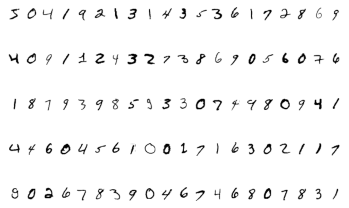

In [10]:
for i in range(100):
    plt.subplot(5, 20, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [11]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


import pandas as pd

In [12]:
# import TesorFolw libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LeakyReLU


- Check datta shape and info

In [13]:
# Always always check shapes! 
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
ytrain.shape, ytest.shape

((60000,), (10000,))

In [15]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

((60000, 28, 28), (28, 28))

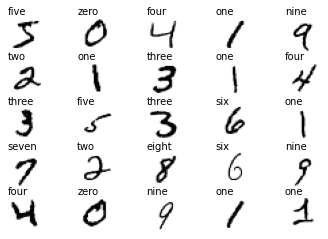

In [16]:
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap='Greys')
    plt.axis('off')
    numeric_class = ytrain[i]
    text_class = class_names[numeric_class]
    plt.text(0, 0, text_class) # displays y-values in each subplot

xtrain.shape, xtrain[1].shape

zero


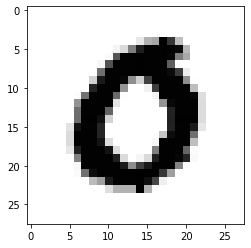

In [18]:
pic = 8000
plt.imshow(xtrain[pic],cmap = 'Greys')
print(class_names[ytrain[pic]])

- flatten the pictures in an array to be able to input them in the model

In [8]:
K.clear_session()

model = Sequential([
                 Dense(units=4,activation ='sigmoid', input_shape = (2,)),# in i/p shape ',' is necessary at end when you have only one dimension
                 Dense(units=10,activation ='sigmoid')
])